In [1]:
%reset
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np
import defmod as dm
import multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.hamiltonian_multishape as hamiltonian
import defmod.registrationdata as regdata

torch.set_default_tensor_type(torch.DoubleTensor)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
dim = 2
origin = [[0.,0.], [10.,0.]]
radius = [2., 1.]
nb_pts = [10, 7]

data = regdata.PointCircles()
data(nb_pts, origin, radius, transvec = [[0.,5.], [0.,-5.]], scal=1)

source = data.source
target = data.target

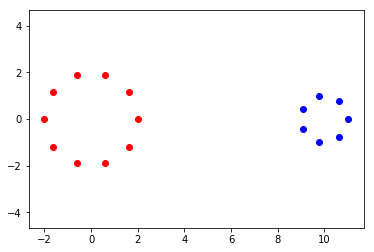

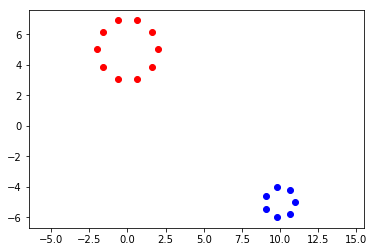

In [3]:
plt.scatter(source[0][:, 0].detach().numpy(), source[0][:, 1].detach().numpy(), c='red')
plt.scatter(source[1][:, 0].detach().numpy(), source[1][:, 1].detach().numpy(), c='blue')
plt.axis('equal')

plt.figure()
plt.scatter(target[0][:, 0].detach().numpy(), target[0][:, 1].detach().numpy(), c='red')
plt.scatter(target[1][:, 0].detach().numpy(), target[1][:, 1].detach().numpy(), c='blue')

plt.axis('equal')
plt.show()

In [18]:
# Defining the deformation modules
sigma1 = 3
manifold1 = dm.manifold.Landmarks(dim, nb_pts[0], gd=source[0].view(-1))
trans1 = dm.deformationmodules.Translations(manifold1, sigma1)

sigma2 = 3
manifold2 = dm.manifold.Landmarks(dim, nb_pts[1], gd=source[1].view(-1))
trans2 = dm.deformationmodules.Translations(manifold2, sigma2)

module_list = [trans1, trans2]
sigma_bg = 0.1

modules = dm.multishape.MultiShapeModule(module_list, sigma_bg)

In [22]:
constr_Id = dm.constraints.Identity()
H = hamiltonian.Hamiltonian_multi(modules, constr_Id)

[autoreload of defmod.models failed: Traceback (most recent call last):
  File "/home/rosa/.local/share/miniconda2/envs/py3projects/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/rosa/.local/share/miniconda2/envs/py3projects/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/home/rosa/.local/share/miniconda2/envs/py3projects/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/rosa/.local/share/miniconda2/envs/py3projects/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_

In [23]:
my_model = dm.models.ModelMultishapePointsRegistration(source, [trans1, trans2], sigma_bg,  dm.attachement.L2NormAttachement_multi(), constr_Id)
costs = my_model.fit(target, lr=1e-4, l=1e5, max_iter=200, log_interval=5)

It: 0, deformation cost: 0.000000, attach: 1581138.830084. Total cost: 1581138.830084
It: 5, deformation cost: 173.791308, attach: 168539.749712. Total cost: 168713.541020
It: 10, deformation cost: 172.789414, attach: 163484.799786. Total cost: 163657.589201
It: 15, deformation cost: 170.344059, attach: 150921.585303. Total cost: 151091.929362
It: 20, deformation cost: 166.918220, attach: 133039.864936. Total cost: 133206.783156
It: 25, deformation cost: 163.640534, attach: 115661.738844. Total cost: 115825.379379
It: 30, deformation cost: 160.896954, attach: 100907.974362. Total cost: 101068.871316
It: 35, deformation cost: 158.635727, attach: 88596.814736. Total cost: 88755.450463
It: 40, deformation cost: 156.752050, attach: 78229.048587. Total cost: 78385.800637
It: 45, deformation cost: 155.161623, attach: 69389.839850. Total cost: 69545.001473
It: 50, deformation cost: 153.802799, attach: 61770.953101. Total cost: 61924.755900
It: 55, deformation cost: 152.630500, attach: 55144.4

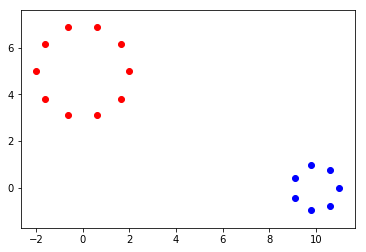

In [24]:
my_model.compute(target)
shot_gd = my_model()

plt.scatter(shot_gd[0].view(-1,2)[:, 0].detach().numpy(),shot_gd[0].view(-1,2)[:, 1].detach().numpy(), c='red')
plt.scatter(shot_gd[1].view(-1,2)[:, 0].detach().numpy(),shot_gd[1].view(-1,2)[:, 1].detach().numpy(), c='blue')
plt.axis('equal')
plt.show()

In [25]:
my_model.compute_deformation_grid()

TypeError: compute_deformation_grid() missing 3 required positional arguments: 'grid_origin', 'grid_size', and 'grid_resolution'

In [59]:
out = my_model()
%matplotlib qt5
#plt.subplot(1, 2, 1)
#dm.usefulfunctions.plot_tensor_scatter(target[0], alpha=0.4)
#dm.usefulfunctions.plot_tensor_scatter(source[0], alpha=0.4)
#ax = plt.subplot(1, 2, 2)
#dm.usefulfunctions.plot_tensor_scatter(target[0], alpha=0.4)
#dm.usefulfunctions.plot_tensor_scatter(out[0][0], alpha=0.4)
#plt.plot(my_model.shot_manifold[1].gd[0].detach().view(-1, 2)[:, 1].numpy(), my_model.shot_manifold[1].gd[0].detach().view(-1, 2)[:, 0].numpy(), '.')
#plt.plot(my_model.shot_manifold[2].gd[0].detach().view(-1, 2)[:, 1].numpy(), my_model.shot_manifold[2].gd[0].detach().view(-1, 2)[:, 0].numpy(), '.')
gridpos_x, gridpos_y = my_model.compute_deformation_grid(torch.tensor([-2, -2]), torch.tensor([12, 12]), torch.tensor([16, 16]))
dm.usefulfunctions.plot_grid(ax, gridpos_y.detach().numpy(), gridpos_x.detach().numpy(), color='C0')
plt.show()


TypeError: div(): argument 'other' (position 1) must be Tensor, not list

In [95]:
# Why??
print(H.module.manifold.gd[0].view(-1) - shot_gd[0].view(-1))
print(H.module.manifold.gd[1].view(-1) - shot_gd[1].view(-1))
print(H.module.manifold.gd[2][0].view(-1) - shot_gd[2][0].view(-1))
print(H.module.manifold.gd[2][1].view(-1) - shot_gd[2][1].view(-1))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<SubBackward0>)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<SubBackward0>)
tensor([-3.4761e-03, -5.0040e+00, -2.8647e-03, -5.0060e+00, -1.1072e-03,
        -5.0074e+00,  1.1072e-03, -5.0074e+00,  2.8647e-03, -5.0060e+00,
         3.4761e-03, -5.0040e+00,  2.7632e-03, -5.0020e+00,  1.0445e-03,
        -5.0008e+00, -1.0445e-03, -5.0008e+00, -2.7632e-03, -5.0020e+00],
       grad_fn=<SubBackward0>)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<SubBackward0>)


In [86]:
grid_origin = [0,0]
grid_size = [10,10]
grid_resolution = [16, 16]

x, y = torch.meshgrid([
            torch.linspace(grid_origin[0], grid_origin[0]+grid_size[0], grid_resolution[0]),
            torch.linspace(grid_origin[1], grid_origin[1]+grid_size[1], grid_resolution[1])])

gridpos = dm.usefulfunctions.grid2vec(x, y)

grid_landmarks = dm.manifold.Landmarks(2, gridpos.shape[0], gd=gridpos.view(-1))
grid_silent = dm.deformationmodules.SilentPoints(grid_landmarks)
        
boundary_labels = [np.zeros(grid_landmarks.nb_pts), *[np.ones(mod.manifold.nb_pts) for mod in module_list]]
        
multi_silent = dm.multishape.MultiShapeModule([grid_silent, *module_list], sigma_bg, boundary_labels)

In [88]:
hamiltonian_silent = dm.hamiltonian_multishape.Hamiltonian_multi(multi_silent, constr_Id)
intermediate = dm.shooting.shoot_euler(hamiltonian_silent, it=10)

controls shape torch.Size([0])
boundary 0.0
controls shape torch.Size([20])
boundary 10.0
controls shape torch.Size([14])
boundary 7.0


RuntimeError: invalid argument 8: lda should be at least max(1, 0), but have 0 at /opt/conda/conda-bld/pytorch_1544174967633/work/aten/src/TH/generic/THBlas.cpp:330

In [72]:
multi_silent.module_list[0].controls

tensor([], requires_grad=True)

In [73]:
multi_silent.module_list[0].manifold.dim_gd

(512,)

In [71]:
multi_silent.module_list[0].fill_controls_zero()

In [76]:
np.sum(boundary_labels[1])

10.0

In [77]:
[np.sum(labels) for labels in boundary_labels]

[0.0, 10.0, 7.0]

In [78]:
np.sum([np.sum(labels) for labels in boundary_labels])

17.0